In [6]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(192, 263, 3)


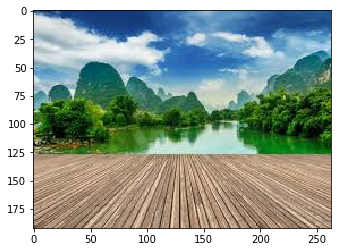

In [14]:
image = plt.imread('1.jpeg')
print(image.shape)
plt.imshow(image)

(192, 263)


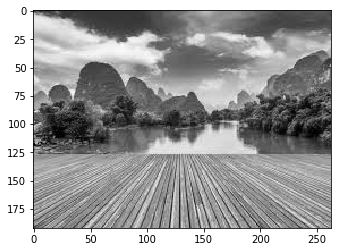

In [8]:
gray = rgb2gray(image)
print(gray.shape)
plt.imshow(gray, cmap='gray')

[0.2348498  0.34465373 0.37994784 ... 0.39810118 0.52751294 0.63339529]
0.5175623838036483


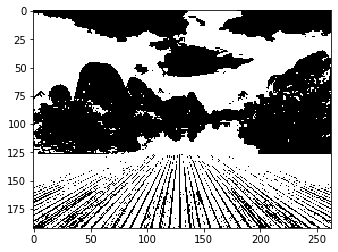

In [9]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
print(gray_r)
print(gray_r.mean())
for pixel in range(gray_r.shape[0]):
    if gray_r[pixel] > gray_r.mean():
        gray_r[pixel] = 1
    else:
        gray_r[pixel] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [10]:
print(gray.shape[0]*gray.shape[1])
print(gray)
gray_r=gray.reshape(gray.shape[0]*gray.shape[1])

50496
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


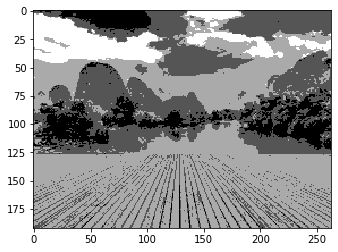

In [11]:
# We can define multiple thresholds as well to detect multiple objects:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

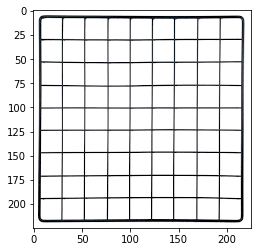

In [13]:
image = plt.imread('index.png')
plt.imshow(image)

In [15]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [16]:
# here mode determines how the input array is extended when the filter overlaps a border.
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')

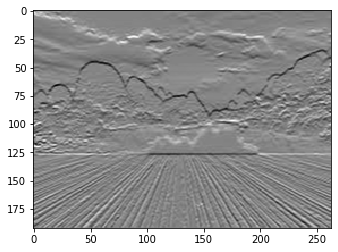

In [17]:
plt.imshow(out_h, cmap='gray')

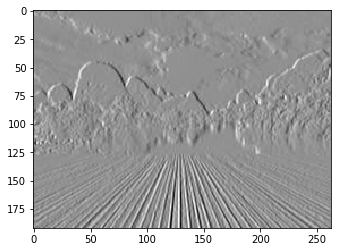

In [18]:
plt.imshow(out_v, cmap='gray')

In [19]:
#There is one more type of filter that can detect both horizontal and vertical edges at the same time. This is called the laplace operator:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


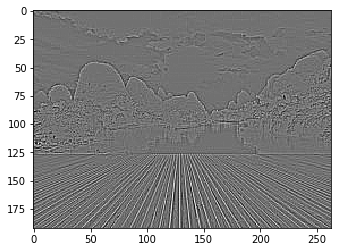

In [20]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

(192, 263, 3)


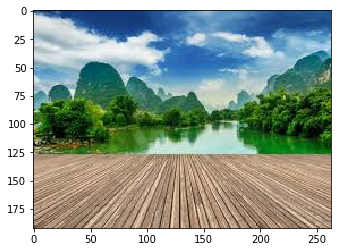

In [32]:
pic = plt.imread('1.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [33]:
# For clustering the image using k-means, we first need to convert it into a 2-dimensional array whose shape will be (length*width, channels)
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(50496, 3)

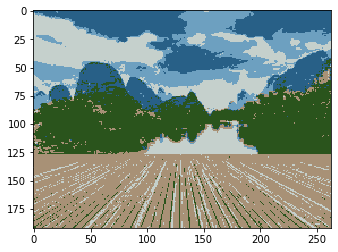

In [67]:
from sklearn.cluster import KMeans
# The cluster_centers_ function of k-means will return the cluster centers 
# and labels_ function will give us the label for each pixel (it will tell us which pixel of the image belongs to which cluster).

kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

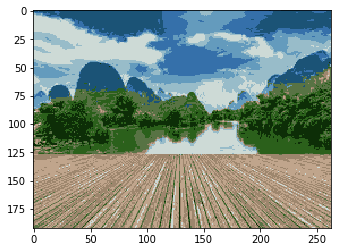